# Visualización de datos sobre dataset de Cálidad de Vino

#### En este notebook se presentarán diferentes gráficos utilizados en un análisis exploratorio. En este caso se trabajará sobre un dataset público que posee datos sobre diferentes vinos de la empresa portugesa Vinho Verde.
#### Entre los datos podremos observar los asociados a pruebas fisioquímicas, como por ejemplo la cantidad de alcohol el PH y la densidad y un dato sensorial, la calidad del vino.

# Importación de las librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Carga y union de datasets
#### Los datos de los vinos provienen de dos archivos distintos (del tipo csv) que serán unidos en un dataframe "wines"

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

# Usando el método head(), podemos ver los primeros registros del dataframe

In [3]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          high  
1      9.9        5       red           low  
2     12.0        7     white        medium  
3      9.5        6     white        medium  
4      8.9        6     white        medium

### Entendimiento del Negocio/Problema

El vino es una bebida alcohólica hecha a partir de uvas que se fermenta sin la adición de azúcares, ácidos, enzimas, agua, u otros nutrientes.

El vino tinto se elabora con uvas rojas y negras oscuras. El color varía normalmente de varios tonos de rojo, azul y violeta. Esto se produce con uvas enteras incluyendo la piel, que se suma al color y sabor de vino tinto.


El vino blanco se elabora con uvas blancas sin piel o semillas. El color es generalmente de color amarillo pajizo, amarillo-verde o amarillo-oro. La mayoría de los vinos blancos tienen un sabor ligero y afrutado, en comparación con los vinos tintos

### Entendimiento de las propiedades de los vinos (nuestras variables) 


- **fixed acidity (Ácidos Fijos):** Los ácidos son una de las propiedades fundamentales de vino y contribuyen en gran medida al sabor del vino. Significativamente reducir el ácido podría conducir a un sabor plano. Los ácidos fijos incluyen tartárico, málico, cítrico y ácido succínico, que se encuentra en las uvas (excepto succínico). Esta variable se expresa generalmente en $\frac{g(tartaricacid)}{dm^3}$ en el dataset.


- **volatile acidity (Ácido Volatil):** Estos ácidos se generan al separarse por destilación del vino antes de completar el proceso de producción. Está constituido principalmente de ácido acético aunque otros ácidos como láctico, ácido butírico y fórmico también pueden estar presentes. El exceso de ácidos volátiles son indeseables y dan lugar a un sabor desagradable. En los EE.UU., los límites legales de acidez volátil son 1,2 g / 50 para el vino tinto de mesa y 1,1 g / 50 para el vino blanco de mesa. La acidez volátil es expresada en $\frac{g(aceticacid)}{dm^3}$ en el dataset.


- **citric acid (Ácido Cítrico):** Este es uno de los ácidos fijos que da al vino su frescura. Por lo general, la mayor parte se consume durante el proceso de fermentación y, a veces se añade por separado para dar el vino más frescura. Por lo general se expresa en $\frac{g}{dm^3}$ en el dataset.


- **residual sugar (Azucar Residual):** Esto se refiere típicamente al azúcar natural de la uva que permanece luego de que el proceso de fermentación se detiene, o se detuvo. Por lo general se expresa en $\frac{g}{dm^3}$ en el dataset.


- **chlorides (Cloruros):** Esto suele ser un importante contribuyente a la salinidad en el vino. Por lo general se expresa en $\frac{g(sodiumchloride)}{dm^3}$ en el dataset.


- **free sulfur dioxide (Dióxido de Azufre libre):** Esta es la parte del dióxido de azufre que cuando se añade a un vino se dice que es libre después de la ligante parte restante. Los Enólogos siempre tratarán de conseguir la más alta proporción de azufre libre de unirse. También son conocidos como los sulfitos y demasiado de él no es deseable y da un olor a acre. Esta variable se expresa en $\frac{mg}{dm^3}$ en el dataset.


- **total sulfur dioxide (Total de Dióxido de Azufre):** Esta es la suma total de el dióxido de azufre libre ($SO_2$).Está expresado en $\frac{mg}{dm^3}$. Esto se añade principalmente para matar las bacterias dañinas y preservar su calidad y frescura. Por lo general hay límites legales de los niveles de azufre en el vino y el exceso de la misma, incluso pueden matar a una buena levadura y dar un olor indeseable.


- **density (Densidad):** Esto se puede representar como una comparación del peso de un volumen específico de vino a un volumen equivalente de agua. Se utiliza generalmente como una medida de la conversión de azúcar en alcohol. Se expresa en $\frac{g}{cm^3}$.


- **pH:** También conocido como el potencial de hidrógeno, esto es una escala numérica para especificar la acidez o basicidad del vino. La acidez fija contribuye en mayor medida hacia el pH de los vinos. Soluciones con un pH inferior a 7 son ácidas, mientras que las soluciones con un pH mayor que 7 son básicas. Con un pH de 7, el agua pura es neutra. La mayoría de los vinos tienen un pH entre 2,9 y 3,9 y por lo tanto son demasiado ácidos.


- **sulphates (Sulfatos):** Estos son sales minerales que contiene azufre. Sulfatos son al vino como el pegamento es a la alimentación. Ellos son una parte regular de la elaboración del vino en todo el mundo y se consideran esenciales. Están conectados al proceso de fermentación y afecta el aroma y el sabor del vino. Se expresan en $\frac{g(potassiumsulphate)}{dm^3}$ en el dataset.


- **alcohol:** El vino es una bebida alcohólica. El alcohol se forma como resultado de la conversión de la leadura en azúcar durante el proceso de fermentación. El porcentaje de alcohol puede variar de un vino a otro. Por lo tanto no es una sorpresa para este atributo a ser parte de este conjunto de datos. Por lo general se mide en% vol o alcohol por volumen.


- **quality (Calidad):** Expertos en vino calificaron la calidad del vino entre 0 (muy malo) y 10 (muy excelentes). La puntuación de la calidad final es la media de al menos tres evaluaciones realizadas por los mismos expertos en vino.


- **wine_type (Tipo de Vino):** Ya que originalmente se tenían dos conjuntos de datos para el vino tinto y blanco, se introdujo este atributo en el conjunto de datos resultante de la fusión final que indica el tipo de vino para cada punto de datos. Un vino puede ser 'tinto' o un vino 'blanco'. 


- **quality_label (Tipo de Calidad):** Este es un atributo derivado del atributo `Calidad`. Las puntuaciones de calidad del vino se agrupan en tres grupos cualitativamente, baja, media y alta calidad. Los vinos de calidad con una puntuación de 1, 2 ,3, 4 y 5 son de baja calidad, las puntuaciones de 6 y 7 son de calidad media decenas de 8, 9 y 10 son vinos de alta calidad. . 

# Análisis exploratorio (EDA)

## Estadísticas descriptivas
#### Calculo las medidas básicas que nos ofrece el método describe() para ambos datasets por separado y los uno en una misma tabla. Para poder visualizar mejor la tabla, divido a las variables en dos grupos y genero dos tablas.

In [4]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [5]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(),2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(),2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(),2)
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

# Análisis univariado

## Visualizaciones en una dimensión

#### Los Histogramas nos ayudan a ver la cantidad de veces que aparecen los distintos valores de las variables. Si tenemos variables categóricas separamos por cada una de ellas. Para el caso de variables continuas debemos agruparlas en diferentes rangos o "bins". En el siguiente caso, agrupamos las variables numéricas en 15 bins.

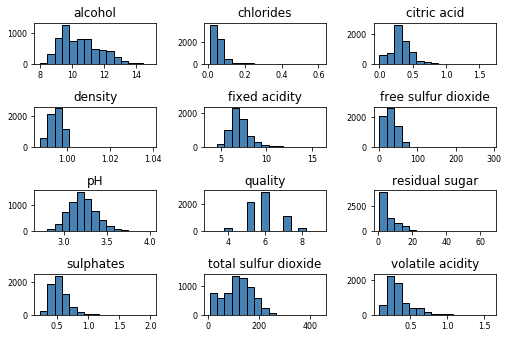

In [6]:
wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

### A continuación podémos ver el histograma de la variable "Sulphate"

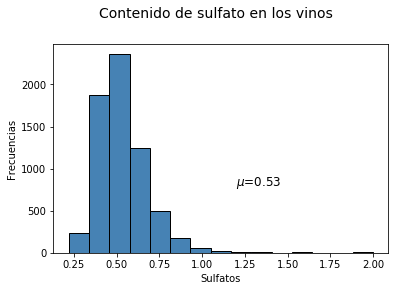

In [7]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Contenido de sulfato en los vinos", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulfatos")
ax.set_ylabel("Frecuencias") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

### Para el caso de la variable categórica "Calidad", vemos su histograma.

#### El equivalente al histograma es la tabla de frecuencias vista en el módulo 2

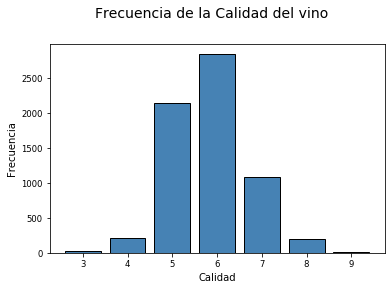

In [8]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Frecuencia de la Calidad del vino", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Calidad")
ax.set_ylabel("Frecuencia") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

### Otra visualización univariada muy útil es el gráfico de densidad. 


#### A continuación observamos nuevamente variable sulfato pero representada en un gráfico de densidad. En esta clase de gráfico no hace falta agrupar en bins.

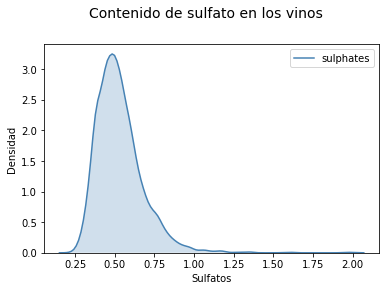

In [9]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Contenido de sulfato en los vinos", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulfatos")
ax1.set_ylabel("Densidad") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

# Análisis Multivariado

### A continuación empezaremos a tratar con visualizaciones que reflejan la interacción de varias variables. 

## Visualizaciones en dos dimensiones

### El Scatterplot o Diagrama de Dispersión es el gráfico por excelencia para comparar dos variables numericas. En éste gráfico se ubicarán todas las observaciones en el lugar del espacio correspondiente a los valores de los de los dos atributos presentes en los ejes.

Text(0.5, 1.05, 'Wine Sulphates - Alcohol Content')

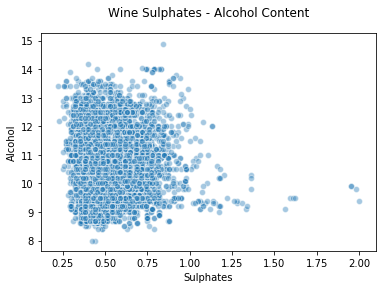

In [10]:
plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)

#### Un problema del Diagrama de dispersión es que un punto puede tener una gran cantidad de observaciones. Por este motivo se puede llegar a conclusiones erróneas si no se tienen en cuenta los diagramas de densidad.
#### Una posibilidad forma de enriquecer el gráfico es agregando la densidad en los costados.

/Users/A308156/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


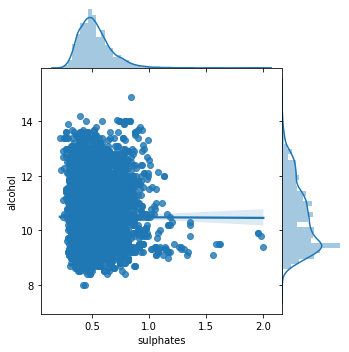

In [11]:
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
              kind='reg', space=0, size=5, ratio=4)

### El Heatmap o Mapa de Calor nos permite ver en un simple vistazo los valores importantes del análisis.

#### En este caso podemos ver un mapa de calor con la correlación entre cada una de las variables.

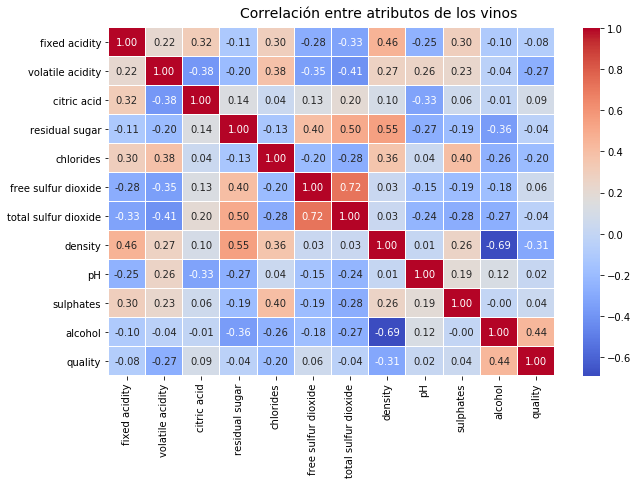

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlación entre atributos de los vinos', fontsize=14)

## Otra forma de ver la correlación entre variables es el Pair Plot. Se puede observar un diagrama de dispersión para cada combinación de variables.

### En las diagonales ya que no tiene sentido ver la relación de una variable consigo misma se grafica la densidad de la misma.

#### Ya que los gráficos ameritan más espacio que en el mapa de calor, para este caso nuevamente dividimos las variables en grupos.

/Users/A308156/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


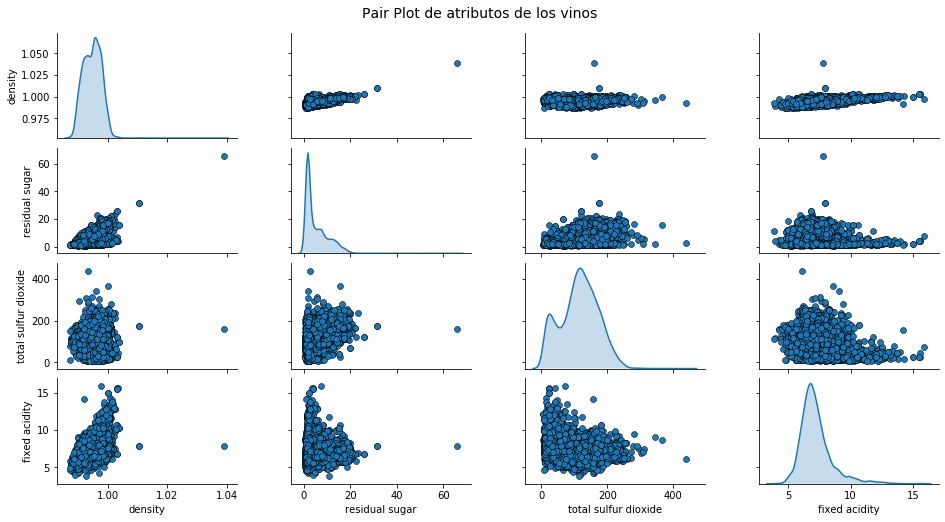

In [13]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pair Plot de atributos de los vinos', fontsize=14)

## Un problema que se nos puede presentar para las comparaciones es la diferencia en las escalas de los distintos valores que toman los atributos. La forma de resolver este inconveniente es con la función StandardScaler(). 

### Esta función normalizará todas las variables para que estén en escalas comparables.

In [14]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

density  residual sugar  total sulfur dioxide  fixed acidity wine_type
0 -0.165631        1.546371              0.181456      -0.166089     white
1  0.301278       -0.681719              0.305311       0.373895       red
2 -0.859324        0.411306              0.305311      -0.320370     white
3  0.408001        1.210056              1.189993      -0.706073     white
4  1.395180        1.777588              2.003900       0.142473     white

### Cuando lo que tenemos que comparar son dos variables categóricas los gráficos de barra son la primer alternativa. Estos nos dan una gran flexibilidad en cuanto a la manera de comparar.

#### Podemos hacer un gráfico de barras para cada categoría.

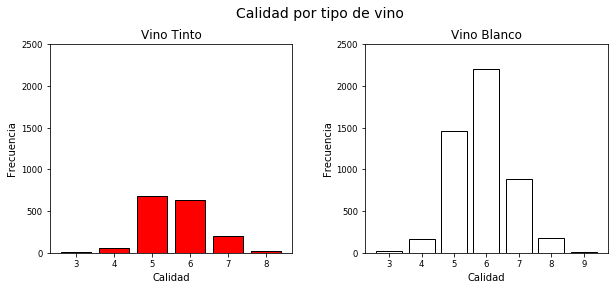

In [15]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Calidad por tipo de vino", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Calidad")
ax1.set_ylabel("Frecuencia") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Calidad")
ax2.set_ylabel("Frecuencia") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
        edgecolor='black', linewidth=1)

#### O podemos hacer un solo gráfico con una barra para cada tipo de vino para cada uno de los niveles de calidad

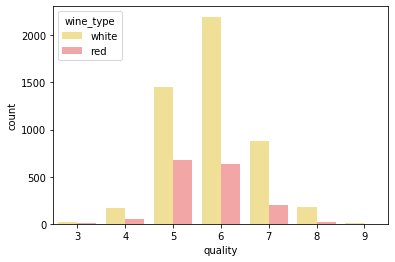

In [16]:
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})

### Para comparaciones entre una variable numérica y una categórica el gráfico de barras también es la primer opción.

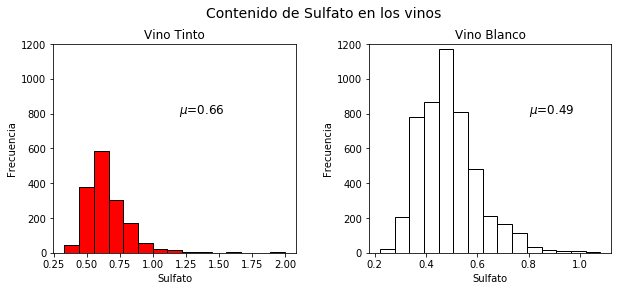

In [17]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Contenido de Sulfato en los vinos", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Sulfato")
ax1.set_ylabel("Frecuencia") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Sulfato")
ax2.set_ylabel("Frecuencia")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)

#### Otra opción son los gráficos de densidad.

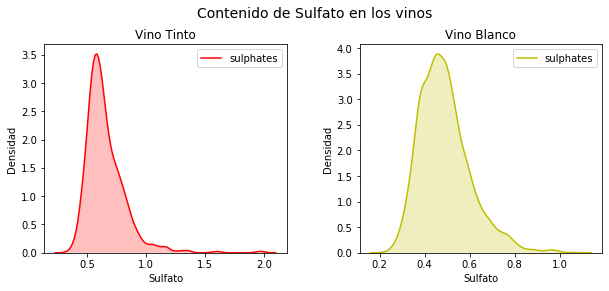

In [18]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Contenido de Sulfato en los vinos", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Vino Tinto")
ax1.set_xlabel("Sulfato")
ax1.set_ylabel("Densidad") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Vino Blanco")
ax2.set_xlabel("Sulfato")
ax2.set_ylabel("Densidad") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

#### Al igual que en los gráficos de barra, puede resultar útil superponerlos.

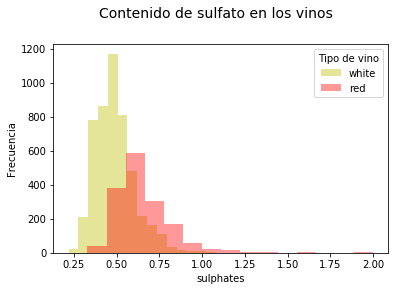

In [19]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Contenido de sulfato en los vinos", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulfatos")
ax.set_ylabel("Frecuencia") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Tipo de vino')
plt.close(2)

### El boxplot es quizás uno de los gráficos más utilizados en el análisis exploratorio debido a la cantidad de información que nos brinda.

Text(0, 0.5, '% de alcohol del vino')

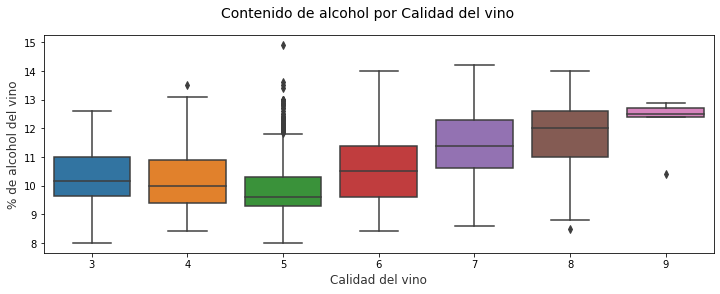

In [20]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Contenido de alcohol por Calidad del vino', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Calidad del vino",size = 12,alpha=0.8)
ax.set_ylabel("% de alcohol del vino",size = 12,alpha=0.8)

### Un gráfico similar es el Violin plot. En vez de mostrar sólo la caja, nos muestra la cómo se distribuyen en densidad.

Text(0, 0.5, 'Sulfato')

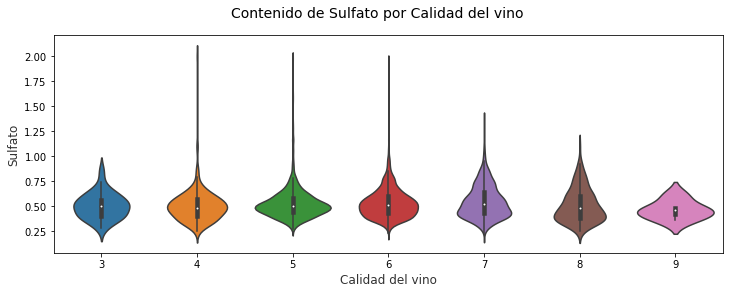

In [21]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Contenido de Sulfato por Calidad del vino', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Calidad del vino",size = 12,alpha=0.8)
ax.set_ylabel("Sulfato",size = 12,alpha=0.8)

#### Un inconveniente de este gráfico es que si existen varias categorías se desperdicia mucho espacio y es preferible realizar el análisis en gráficos separados.

## Visualizaciones en tres dimensiones

### El Diagrama de Dispersión que vimos anteriormente se puede llevar a tres dimensiones utilizando colores.

#### Un dato que se puede agregar al gráfico son las líneas de regresión.

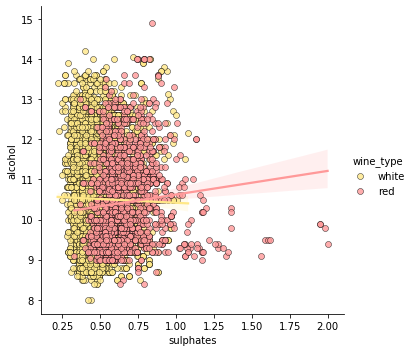

In [22]:
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

### Nuevamente vemos el Pair Plot pero esta vez la tercer dimensión está dada por el color. La combinación en este caso es de dos variables numéricas con una categórica.

/Users/A308156/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


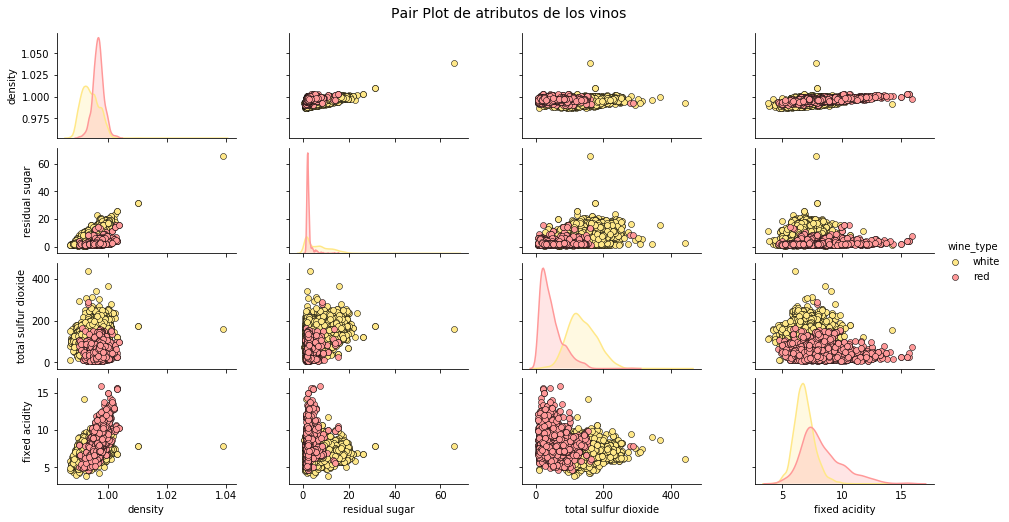

In [23]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pair Plot de atributos de los vinos', fontsize=14)

### En el caso de tener tres variables cuntínuas podemos realizar un Diagrama de Dispersión en 3D.

Text(0.5, 0, 'Alcohol')

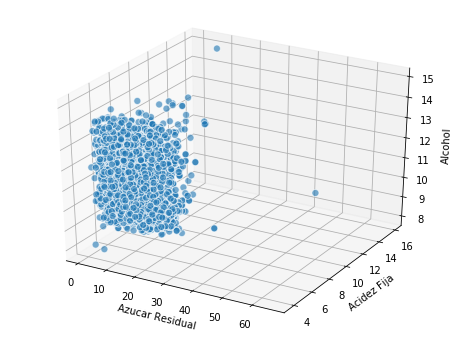

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Azucar Residual')
ax.set_ylabel('Acidez Fija')
ax.set_zlabel('Alcohol')

#### Otra posibilidad es que la tercer dimensión no sea un nuevo eje sino el tamaño de los círculos. Esta clase de Diagrama de Dispersión es comúnmente conocido como Diagrama de Burbujas.

Text(0.5, 1.05, 'Contenido de Alcohol, Azucar Residual y Acidez Fija')

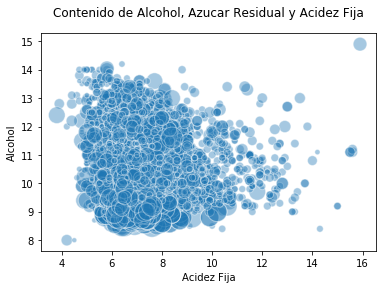

In [25]:
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Acidez Fija')
plt.ylabel('Alcohol')
plt.title('Contenido de Alcohol, Azucar Residual y Acidez Fija',y=1.05)

### Teniendo tres variables categóricas, por lo general la mejor opción son nuevamente los gráficos de barras.

/Users/A308156/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


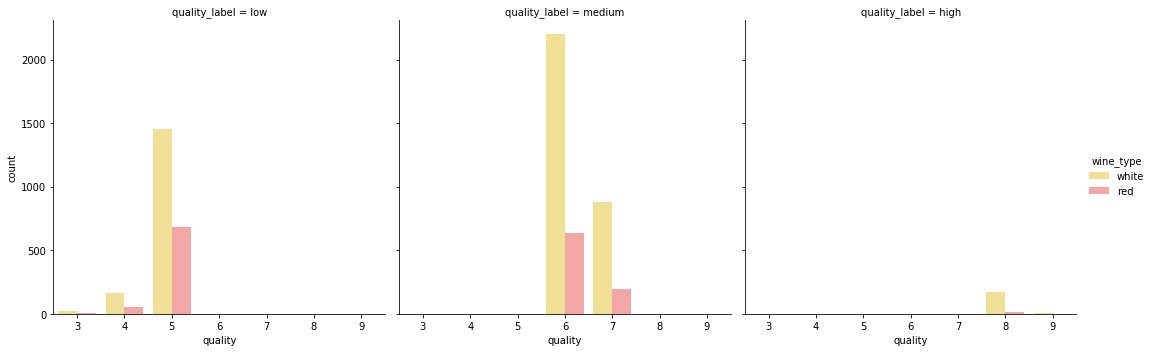

In [26]:
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

### Otra forma de mapa de calor es la siguiente. También se lo conoce como Curvas de Nivel.

El hallazgo mas importante es:....

(0, 1)

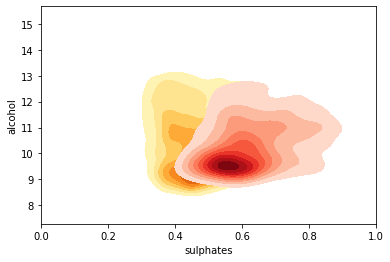

In [27]:
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)
plt.xlim((0,1))

### Otra forma de violin plot cuando tenemos una variable categórica binaria es la siguiente.

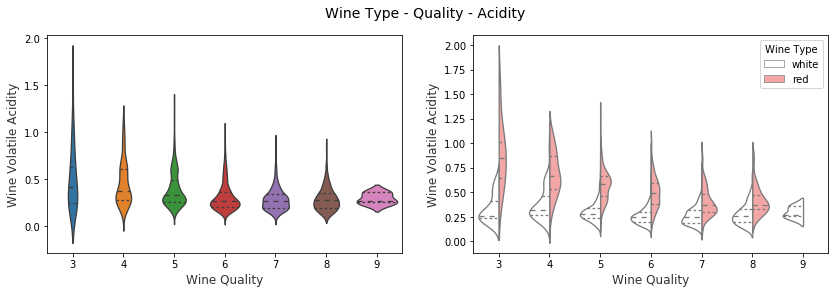

In [28]:
f, (ax1, ax2) = plt.subplots(1,2,  figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

### Se puede repetir lo mismo utilizando Box plots.

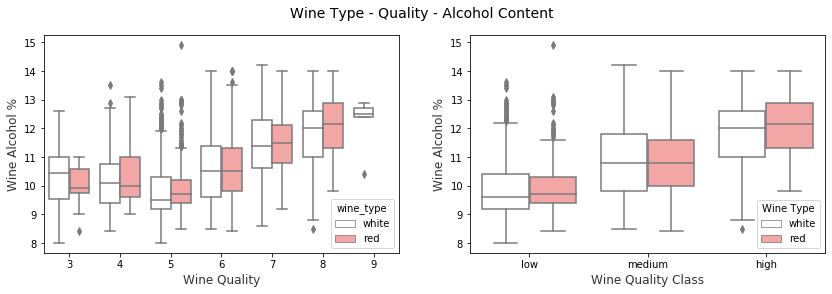

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')